Лабораторна робота №1
Лимаренко Артем ДА-12

В роботі будуть використані наступні модулі

In [34]:
import numpy as np
import matplotlib.pyplot as plt

Спочатку напишемо функцію для читання даних із файлу

In [35]:
def read_csv_file(file_path):
    data = np.loadtxt(file_path, delimiter=',', skiprows=1)
    return data[:, 1], data[:, 2]

Зчитаємо та відобразимо тренувальні дані на окремому графіку

In [36]:
#Тренувальні дані
x_train, y_train = read_csv_file('./train_data/lab_1_train.csv')
print("X train: ", x_train)
print("Y train: ", y_train)

X train:  [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596 ]
Y train:  [20.14901425 19.97872273 20.2347106  20.51751502 20.01056207 20.03076901
 20.59497597 20.37164456 20.02077385 20.34458619 20.06299489 20.0825033
 20.31501292 19.68864219 19.76535293 20.13434404 20.01938299 20.43770854
 20.09122914 19.96014727 20.84373503 20.35650953 20.46470291 20.03722201
 20.32153367 20.53

Відобразимо тренувальні дані на окремому графіку

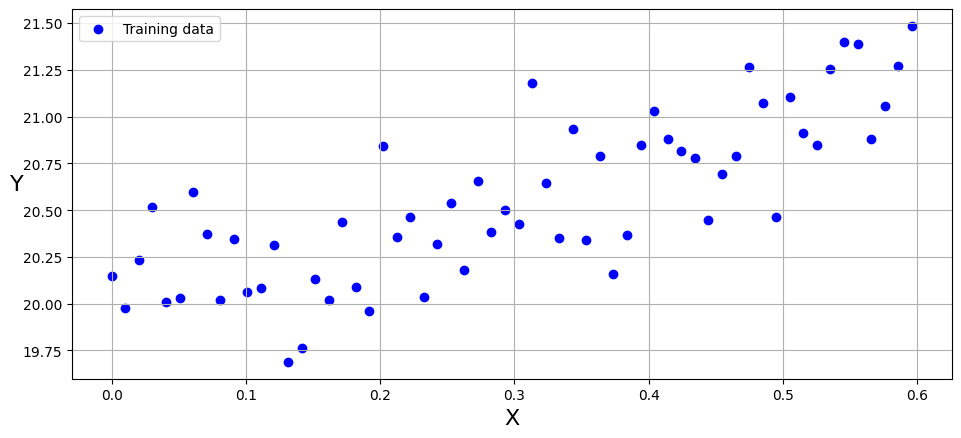

In [37]:
plt.scatter(x_train, y_train, color='blue', label='Training data')

plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16, rotation=0)
plt.subplots_adjust(right=1.5)

plt.grid(True)

plt.legend()

plt.show()

Аналогічно зробимо для тестових даних

In [38]:
#Тестові дані
x_test, y_test = read_csv_file('./train_data/lab_1_test.csv')
print("X test: ", x_test)
print("Y test: ", y_test)

X test:  [0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.8989899
 0.90909091 0.91919192 0.92929293 0.93939394 0.94949495 0.95959596
 0.96969697 0.97979798 0.98989899 1.        ]
Y test:  [21.06836894 21.17662554 20.92062476 20.91386529 21.53668704 21.72000332
 21.3117303  21.65459522 21.48222818 21.20040347 21.5225601  21.8957544
 21.44379764 21.94414057 20.70902596 21.76172227 21.56146766 21.46585335
 21.60328581 20.99968892 21.55026005 21.74349741 22.09993387 21.52128661
 21.45442162 21.5666446  22.01199437 21.85620109 21.61884972 21.95196003
 21.84730508 22.12897734 21.64796993 21.78048923 21.78135745 21.48013743
 22.02823002 22.03791254 21.98133202 21.92962386]


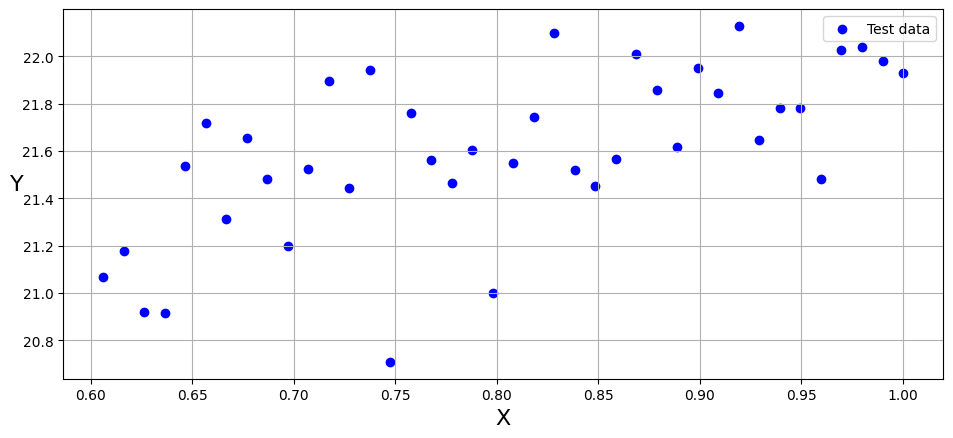

In [39]:
plt.scatter(x_test, y_test, color='blue', label='Test data')

plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16, rotation=0)
plt.subplots_adjust(right=1.5)

plt.grid(True)

plt.legend()

plt.show()

Тепер опишемо саму модель лінійної регресії

In [40]:
def linear_regression(x, intercept, weight):
    return intercept + x * weight 

In [41]:
def mse(y_actual, y_pred):
    return np.mean((np.array(y_actual) - np.array(y_pred)) ** 2)    

In [42]:
def train_linear_regression(x_train, y_train, learning_rate = 0.1, delta = 0.000001):
    intercept, weight = np.random.normal(), np.random.normal()
    
    y_pred = linear_regression(x_train, intercept, weight)
    loss = mse(y_train, y_pred)

    epoch_index = 0
    max_iterations = 5000
    while epoch_index < max_iterations:
        epoch_index += 1

        intercept -= learning_rate * (y_pred - y_train).mean()
        weight -= learning_rate * ((y_pred - y_train) * x_train).mean()

        y_pred_next = linear_regression(x_train, intercept, weight)

        current_loss = mse(y_train, y_pred_next)

        print(f'Epoch {epoch_index}, Intercept: {intercept}, Weight: {weight}, Loss: {current_loss}')

        if abs(loss - current_loss) <= delta:
            return intercept, weight
        
        y_pred = y_pred_next
        loss = current_loss

In [43]:
intercept, weight = train_linear_regression(x_train, y_train)


Epoch 1, Intercept: 1.6529759812389964, Weight: 0.8736114205435803, Loss: 347.42092031370714
Epoch 2, Intercept: 3.5166028467582993, Weight: 1.4323164768630645, Loss: 275.84668899555885
Epoch 3, Intercept: 5.177218743744435, Weight: 1.9288186937360403, Loss: 219.04194234886063
Epoch 4, Intercept: 6.656978288003923, Weight: 2.36991004364382, Loss: 173.95885038288574
Epoch 5, Intercept: 7.9756182467038474, Weight: 2.761641245162385, Loss: 138.17853378319816
Epoch 6, Intercept: 9.15072141110469, Weight: 3.1094026599888425, Loss: 109.7812735474778
Epoch 7, Intercept: 10.197951671451934, Weight: 3.417996361243058, Loss: 87.24350418209312
Epoch 8, Intercept: 11.131263436888696, Weight: 3.6917003365703778, Loss: 69.35606339945137
Epoch 9, Intercept: 11.963088200254353, Weight: 3.9343256844166214, Loss: 55.159311821154155
Epoch 10, Intercept: 12.704500742069843, Weight: 4.1492675681679, Loss: 43.891641389805194
Epoch 11, Intercept: 13.365367195794024, Weight: 4.339550609392821, Loss: 34.948609

Обчислимо втрати для тестових даних

In [44]:
y_test_pred = linear_regression(x_test, intercept, weight)
mse(y_test, y_test_pred)

0.07363160903738421

Покажемо результат на окремому графіку

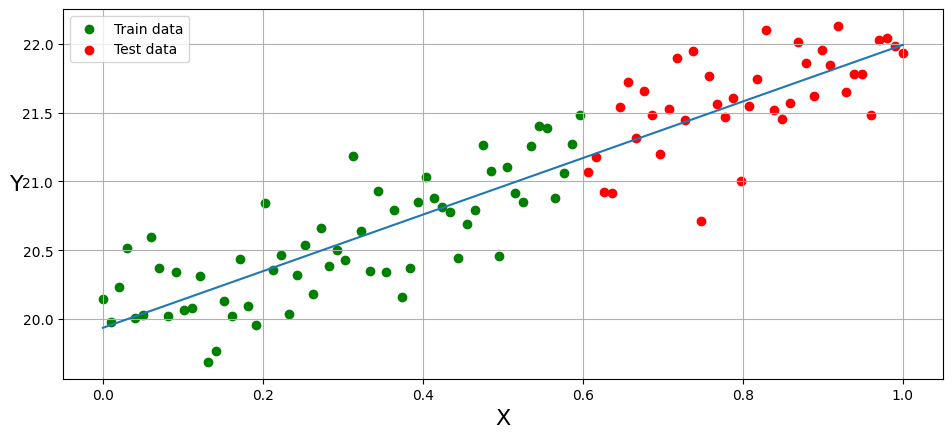

In [45]:
plt.scatter(x_train, y_train, color='green', label='Train data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot( [0, 1], [linear_regression(0, intercept, weight), linear_regression(1, intercept, weight)])

plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16, rotation=0)
plt.subplots_adjust(right=1.5)

plt.grid(True)

plt.legend()

plt.show()